In [6]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras.backend as K
from tensorflow import keras
from keras.layers import Reshape, Conv2DTranspose, PReLU
from keras.utils import to_categorical, plot_model
from keras.layers import Concatenate
import numpy as np
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.image import resize
from scipy.linalg import sqrtm
import tensorflow as tf
from IPython.display import clear_output, HTML
import glob
from keras.layers import AveragePooling2D, ZeroPadding2D, BatchNormalization, Activation, MaxPool2D, Add
from keras.layers import Normalization, Dense, Conv2D, Dropout, BatchNormalization, ReLU
from keras.models import Sequential, Model
from keras import Input
from keras.optimizers import *
from keras.callbacks import EarlyStopping
from keras.initializers import RandomNormal
from keras.layers import LeakyReLU, GlobalMaxPooling2D, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
import numpy as np
from skimage.transform import AffineTransform, warp
from keras import Sequential, Model
from keras.layers import Dense, Conv2D, Reshape, UpSampling2D, \
    BatchNormalization, Activation, Input, LeakyReLU, ZeroPadding2D, Dropout, Flatten, Conv2DTranspose
from keras.optimizers import Adam
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import rotate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Reshape, UpSampling2D, Conv2D, BatchNormalization, Activation, Input, LeakyReLU
from keras.initializers import RandomNormal
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.datasets.fashion_mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
#import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from keras.preprocessing import image
import keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
import time
# import cv2
# from tqdm import tqdm
import numpy as np
import os
import matplotlib.pyplot as plt
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.datasets.fashion_mnist import load_data
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose
from keras.layers import LeakyReLU, Dropout, Embedding, Concatenate


In [7]:
# List physical GPUs and set memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('emnist-letters-train.csv', delimiter=',', header=None)

In [9]:
# df.rename(columns={0: 'labels'}, inplace=True)

In [10]:
df = df[df[0] != -1]

In [11]:
# Define the mapping dictionary
mapping = {1: 97, 2: 98, 3: 99, 4: 100, 5: 101, 6: 102, 7: 103, 8: 104, 9: 105, 
           10: 106, 11: 107, 12: 108, 13: 109, 14: 110, 15: 111, 16: 112, 17: 113, 
           18: 114, 19: 115, 20: 116, 21: 117, 22: 118, 23: 119, 24: 120, 25: 121, 
           26: 122, 27: 123}

        # Map the labels column to its corresponding value
df[0] = df[0].map(mapping)

In [12]:
# X = X / 255.0
y_pre = np.array(df.iloc[:,0].values)
X = np.array(df.iloc[:,1:].values)
X = X.reshape(-1,28,28,1)
preprocessed = []
for image in X:
    rotated_image = rotate(image, 90, reshape=False)
    flipped_image = np.flipud(rotated_image)
    preprocessed.append(flipped_image)
X_pre = np.array(preprocessed)
X_train,X_test,y_train,y_test = train_test_split(X_pre,y_pre,test_size=0.1,random_state=42)

In [10]:
num_classes  = len(np.unique(y_train))

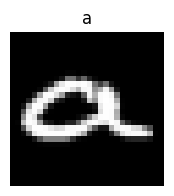

In [11]:
# plotting a random image from the dataset
plt.figure(figsize=(2,2))
idx = np.random.randint(0,len(X_train))
img = np.array(X_train[idx])
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title(chr(y_train[idx]))
plt.show()

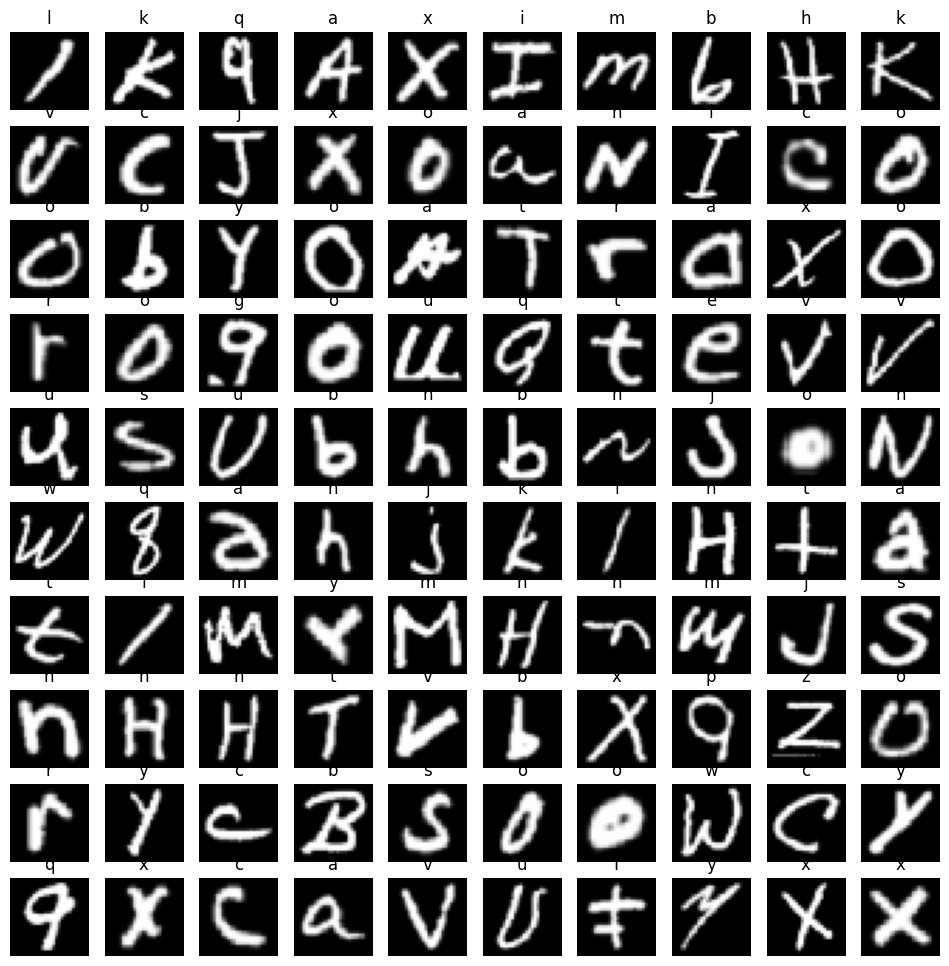

In [12]:
plt.figure(figsize=(12, 12))

for i in range(100):
    # Define subplot
    plt.subplot(10, 10, 1 + i)
    # Turn off axis
    plt.axis('off')
    # Plot raw pixel data in grayscale
    plt.imshow(X_train[i], cmap='gray')
    # Add title (assuming y_train contains ASCII codes)
    plt.title(chr(y_train[i]))

# Show the plot
plt.show()

In [13]:
class DCGAN():
    def __init__(self, rows, cols, channels, z = 100):
        # Input shape
        self.img_rows = rows
        self.img_cols = cols
        self.channels = channels
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = z
        optimizer = Adam(0.00001, 0.25)
        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy'])
        # Build the generator
        self.generator = self.build_generator()
        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)
        # For the combined model we will only train the generator
        self.discriminator.trainable = False
        # The discriminator takes generated images as input and
        # determines validity
        valid = self.discriminator(img)
        # The combined model (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy',
        optimizer=optimizer)

    def build_generator(self):
        model = Sequential()
        
        model.add(Dense(128 * 7 * 7, activation="relu", input_dim=self.latent_dim, kernel_initializer=RandomNormal(0, 0.02)))
        model.add(Reshape((7, 7, 128)))
        model.add(UpSampling2D())
        
        model.add(Conv2D(128, kernel_size=3, padding="same", kernel_initializer=RandomNormal(0, 0.02)))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(UpSampling2D())
        
        model.add(Conv2D(128, kernel_size=3, padding="same", kernel_initializer=RandomNormal(0, 0.02)))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2D(64, kernel_size=3, padding="same", kernel_initializer=RandomNormal(0, 0.02)))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2D(64, kernel_size=3, padding="same", kernel_initializer=RandomNormal(0, 0.02)))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2D(64, kernel_size=3, padding="same", kernel_initializer=RandomNormal(0, 0.02)))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Conv2D(64, kernel_size=3, padding="same", kernel_initializer=RandomNormal(0, 0.02)))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Conv2D(self.channels, kernel_size=3, padding="same", kernel_initializer=RandomNormal(0, 0.02)))
        model.add(Activation("tanh"))
        
        model.summary()
        
        noise = Input(shape=(self.latent_dim,))
        img = model(noise)
        
        return Model(noise, img)

    def build_discriminator(self):
        model = Sequential()
        model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
        model.add(ZeroPadding2D(padding=((0,1),(0,1))))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        img = Input(shape=self.img_shape)
        validity = model(img)
        return Model(img, validity)


    def save_imgs(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        # gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        os.makedirs('generated_mnist', exist_ok=True)
        fig.savefig("generated_mnist/dcgan_mnist_improved_{:d}.png".format(epoch))
        plt.close()
        
    def train(self, epochs, batch_size=128, save_interval=50):
        # Load the dataset
        X_train = X_pre
        # Rescale -1 to 1
        X_train = X_train / 127.5 - 1  # Corrected normalization
        X_train = np.expand_dims(X_train, axis=3)
        
        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        
        for epoch in range(epochs):
            # ---------------------
            # Train Discriminator
            # ---------------------
            # Select a random half of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]
            
            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)
            
            # Train the discriminator (real classified as ones and generated as zeros)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            # ---------------------
            # Train Generator
            # ---------------------
            for _ in range(3):
                # Sample noise
                noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
                
                # Train the generator (wants discriminator to mistake images as real)
                g_loss = self.combined.train_on_batch(noise, valid)
            
                # Plot the progress
                print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

        # If at save interval => save generated image samples
        if epoch % save_interval == 0:
            self.save_imgs(epoch)

In [14]:
dcgan = DCGAN(28,28,1)
dcgan.train(epochs=150, batch_size=128, save_interval=50)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 32)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 zero_padding2d (ZeroPadding  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 64)         256       
 ormalization)                                          

In [15]:
# example of training an conditional gan on the fashion mnist dataset
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.datasets.fashion_mnist import load_data
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Concatenate

# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1), n_classes=26):
	# label input
	in_label = Input(shape=(1,))
	# embedding for categorical input
	li = Embedding(n_classes, 50)(in_label)
	# scale up to image dimensions with linear activation
	n_nodes = in_shape[0] * in_shape[1]
	li = Dense(n_nodes)(li)
	# reshape to additional channel
	li = Reshape((in_shape[0], in_shape[1], 1))(li)
	# image input
	in_image = Input(shape=in_shape)
	# concat label as a channel
	merge = Concatenate()([in_image, li])
	# downsample
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(merge)
	fe = LeakyReLU(alpha=0.2)(fe)
	# downsample
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
	fe = LeakyReLU(alpha=0.2)(fe)
	# flatten feature maps
	fe = Flatten()(fe)
	# dropout
	fe = Dropout(0.4)(fe)
	# output
	out_layer = Dense(1, activation='sigmoid')(fe)
	# define model
	model = Model([in_image, in_label], out_layer)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

# define the standalone generator model
def define_generator(latent_dim, n_classes=26):
	# label input
	in_label = Input(shape=(1,))
	# embedding for categorical input
	li = Embedding(n_classes, 50)(in_label)
	# linear multiplication
	n_nodes = 7 * 7
	li = Dense(n_nodes)(li)
	# reshape to additional channel
	li = Reshape((7, 7, 1))(li)
	# image generator input
	in_lat = Input(shape=(latent_dim,))
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	gen = Dense(n_nodes)(in_lat)
	gen = LeakyReLU(alpha=0.2)(gen)
	gen = Reshape((7, 7, 128))(gen)
	# merge image gen and label input
	merge = Concatenate()([gen, li])
	# upsample to 14x14
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(merge)
	gen = LeakyReLU(alpha=0.2)(gen)
	# upsample to 28x28
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
	gen = LeakyReLU(alpha=0.2)(gen)
	# output
	out_layer = Conv2D(1, (7,7), activation='tanh', padding='same')(gen)
	# define model
	model = Model([in_lat, in_label], out_layer)
	return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# get noise and label inputs from generator model
	gen_noise, gen_label = g_model.input
	# get image output from the generator model
	gen_output = g_model.output
	# connect image output and label input from generator as inputs to discriminator
	gan_output = d_model([gen_output, gen_label])
	# define gan model as taking noise and label and outputting a classification
	model = Model([gen_noise, gen_label], gan_output)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

# load fashion mnist images
def load_real_samples():
	# load dataset
	trainX, trainy = X_pre, y_pre
	# expand to 3d, e.g. add channels
	X = expand_dims(trainX, axis=-1)
	# convert from ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [-1,1]
	X = (X - 127.5) / 127.5
	return [X, trainy]

# # select real samples
def generate_real_samples(dataset, n_samples):
	# split into images and labels
	images, labels = dataset
	# choose random instances
	ix = randint(0, images.shape[0], n_samples)
	# select images and labels
	X, labels = images[ix], labels[ix]
	# generate class labels
	y = ones((n_samples, 1))
	return [X, labels], y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=26):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	# generate labels
	labels = randint(0, n_classes, n_samples)
	return [z_input, labels]

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	z_input, labels_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	images = generator.predict([z_input, labels_input])
	# create class labels
	y = zeros((n_samples, 1))
	return [images, labels_input], y


# function to save generated images
def save_imgs(generator, latent_dim, epoch):
    r, c = 5, 5
    z_input, labels_input = generate_latent_points(latent_dim, r * c)
    gen_imgs = generator.predict([z_input, labels_input])
    gen_imgs = 0.5 * gen_imgs + 0.5
    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    os.makedirs('generated_mnist', exist_ok=True)
    fig.savefig("generated_mnist/CGAN_mnist_{:d}.png".format(epoch))
    plt.close()


# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
	bat_per_epo = int(dataset[0].shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		# get randomly selected 'real' samples
		[X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
		# update discriminator model weights
		d_loss1, _ = d_model.train_on_batch([X_real, labels_real], y_real)
		# generate 'fake' examples
		[X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		# update discriminator model weights
		d_loss2, _ = d_model.train_on_batch([X_fake, labels], y_fake)
		# prepare points in latent space as input for the generator
		[z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		g_loss = gan_model.train_on_batch([z_input, labels_input], y_gan)
		# summarize loss on this batch
		print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
			(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
		
		if n_epochs % 5 == 0:
			self.save_imgs(epoch = n_epochs)

	# save the generator model
	g_model.save('CGAN_generator.h5')

# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

c:\Users\user\anaconda3\envs\gpu_env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 1s 14ms/step
>1, 1/693, d1=0.688, d2=0.695 g=0.692
2/2 [==============================] - 0s 16ms/step
>1, 2/693, d1=0.594, d2=0.699 g=0.687
2/2 [==============================] - 0s 17ms/step
>1, 3/693, d1=0.537, d2=0.708 g=0.679
2/2 [==============================] - 0s 15ms/step
>1, 4/693, d1=0.472, d2=0.723 g=0.667
2/2 [==============================] - 0s 16ms/step
>1, 5/693, d1=0.416, d2=0.743 g=0.647
2/2 [==============================] - 0s 15ms/step
>1, 6/693, d1=0.363, d2=0.775 g=0.625
2/2 [==============================] - 0s 16ms/step
>1, 7/693, d1=0.321, d2=0.817 g=0.596
2/2 [==============================] - 0s 16ms/step
>1, 8/693, d1=0.293, d2=0.856 g=0.578
2/2 [==============================] - 0s 16ms/step
>1, 9/693, d1=0.275, d2=0.887 g=0.579
2/2 [==============================] - 0s 17ms/step
>1, 10/693, d1=0.297, d2=0.873 g=0.601
2/2 [==============================] - 0s 15ms/step
>1, 11/693, d1=0.291, d2=0.827 g=0.649
2/2 [===

KeyboardInterrupt: 

In [ ]:
# # example of loading the generator model and generating images
# from numpy import asarray
# from numpy.random import randn
# from numpy.random import randint
# from keras.models import load_model
# from matplotlib import pyplot

# # generate points in latent space as input for the generator
# def generate_latent_points(latent_dim, n_samples, n_classes=10):
# 	# generate points in the latent space
# 	x_input = randn(latent_dim * n_samples)
# 	# reshape into a batch of inputs for the network
# 	z_input = x_input.reshape(n_samples, latent_dim)
# 	# generate labels
# 	labels = randint(0, n_classes, n_samples)
# 	return [z_input, labels]

# # create and save a plot of generated images
# def save_plot(examples, n):
# 	# plot images
# 	for i in range(n * n):
# 		# define subplot
# 		pyplot.subplot(n, n, 1 + i)
# 		# turn off axis
# 		pyplot.axis('off')
# 		# plot raw pixel data
# 		pyplot.imshow(examples[i, :, :, 0], cmap='gray')
# 	pyplot.show()

# # load model
# model = load_model('cgan_generator.h5')
# # generate images
# latent_points, labels = generate_latent_points(100, 100)
# # specify labels
# labels = asarray([x for _ in range(10) for x in range(10)])
# # generate images
# X  = model.predict([latent_points, labels])
# # scale from [-1,1] to [0,1]
# X = (X + 1) / 2.0
# # plot the result
# save_plot(X, 10)

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.datasets.fashion_mnist import load_data
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose
from keras.layers import LeakyReLU, Dropout, Embedding, Concatenate

# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1), n_classes=26):
    in_label = Input(shape=(1,))
    li = Embedding(n_classes, 35)(in_label)
    n_nodes = in_shape[0] * in_shape[1]
    li = Dense(n_nodes)(li)
    li = Reshape((in_shape[0], in_shape[1], 1))(li)
    in_image = Input(shape=in_shape)
    merge = Concatenate()([in_image, li])
    fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(merge)
    fe = LeakyReLU(alpha=0.2)(fe)
    # fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
    # fe = LeakyReLU(alpha=0.2)(fe)
    fe = Flatten()(fe)
    fe = Dropout(0.4)(fe)
    out_layer = Dense(1, activation='sigmoid')(fe)
    model = Model([in_image, in_label], out_layer)
    opt = Adam(lr=0.000002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

# define the standalone generator model
def define_generator(latent_dim, n_classes=26):
    in_label = Input(shape=(1,))
    li = Embedding(n_classes, 35)(in_label)
    n_nodes = 7 * 7
    li = Dense(n_nodes)(li)
    li = Reshape((7, 7, 1))(li)
    in_lat = Input(shape=(latent_dim,))
    n_nodes = 128 * 7 * 7
    gen = Dense(n_nodes)(in_lat)
    gen = LeakyReLU(alpha=0.2)(gen)
    gen = Reshape((7, 7, 128))(gen)
    merge = Concatenate()([gen, li])
    gen = Conv2DTranspose(64, (4,4), strides=(2,2), padding='same')(merge)
    gen = LeakyReLU(alpha=0.2)(gen)
    gen = Conv2DTranspose(64, (4,4), strides=(2,2), padding='same')(gen)
    gen = LeakyReLU(alpha=0.2)(gen)
    out_layer = Conv2D(1, (7,7), activation='tanh', padding='same')(gen)
    model = Model([in_lat, in_label], out_layer)
    return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
    d_model.trainable = False
    gen_noise, gen_label = g_model.input
    gen_output = g_model.output
    gan_output = d_model([gen_output, gen_label])
    model = Model([gen_noise, gen_label], gan_output)
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

def load_real_samples():
    trainX, trainy = X_pre, y_pre
    X = expand_dims(trainX, axis=-1)
    X = X.astype('float32')
    X = (X - 127.5) / 127.5
    return [X, trainy]

# select real samples
def generate_real_samples(dataset, n_samples):
    images, labels = dataset
    ix = randint(0, images.shape[0], n_samples)
    X, labels = images[ix], labels[ix]
    y = ones((n_samples, 1))
    return [X, labels], y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=26):
    x_input = randn(latent_dim * n_samples)
    z_input = x_input.reshape(n_samples, latent_dim)
    labels = randint(0, n_classes, n_samples)
    return [z_input, labels]

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
    z_input, labels_input = generate_latent_points(latent_dim, n_samples)
    images = generator.predict([z_input, labels_input])
    y = zeros((n_samples, 1))
    return [images, labels_input], y

# function to save generated images
def save_imgs(generator, latent_dim, epoch):
    r, c = 5, 5
    z_input, labels_input = generate_latent_points(latent_dim, r * c)
    gen_imgs = generator.predict([z_input, labels_input])
    gen_imgs = 0.5 * gen_imgs + 0.5
    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    os.makedirs('generated_mnist', exist_ok=True)
    fig.savefig("CGAN_Generated_Mnist/CGAN_mnist_{:d}.png".format(epoch))
    plt.close()

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
    bat_per_epo = int(dataset[0].shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    for epoch in range(n_epochs):
        [X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
        d_loss1, _ = d_model.train_on_batch([X_real, labels_real], y_real)
        [X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        d_loss2, _ = d_model.train_on_batch([X_fake, labels], y_fake)
        [z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
        y_gan = ones((n_batch, 1))
        g_loss = gan_model.train_on_batch([z_input, labels_input], y_gan)
        # print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' % (i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
        print ("%d [D1 loss: %.3f:%.3f,  acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss1,d_loss2,100*d_loss1, g_loss))
    if n_epochs % 50 == 0:
        save_imgs(g_model, latent_dim, epoch)
    g_model.save('CGAN_generator.h5')

# size of the latent space
latent_dim = 100
d_model = define_discriminator()
g_model = define_generator(latent_dim)
gan_model = define_gan(g_model, d_model)
dataset = load_real_samples()
train(g_model, d_model, gan_model, dataset, latent_dim)


2/2 [==============================] - 0s 186ms/step
0 [D1 loss: 0.706:0.692,  acc.: 70.56%] [G loss: 0.694477]
2/2 [==============================] - 0s 48ms/step
1 [D1 loss: 0.705:0.693,  acc.: 70.48%] [G loss: 0.692805]
2/2 [==============================] - 0s 67ms/step
2 [D1 loss: 0.705:0.695,  acc.: 70.46%] [G loss: 0.690993]
2/2 [==============================] - 0s 41ms/step
3 [D1 loss: 0.699:0.697,  acc.: 69.92%] [G loss: 0.689059]
2/2 [==============================] - 0s 53ms/step
4 [D1 loss: 0.679:0.699,  acc.: 67.87%] [G loss: 0.686640]
2/2 [==============================] - 0s 54ms/step
5 [D1 loss: 0.685:0.702,  acc.: 68.53%] [G loss: 0.684142]
2/2 [==============================] - 0s 66ms/step
6 [D1 loss: 0.697:0.706,  acc.: 69.75%] [G loss: 0.681726]
2/2 [==============================] - 0s 70ms/step
7 [D1 loss: 0.699:0.709,  acc.: 69.88%] [G loss: 0.677161]
2/2 [==============================] - 0s 134ms/step
8 [D1 loss: 0.685:0.713,  acc.: 68.49%] [G loss: 0.672926]

In [ ]:
class CGAN():

    def __init__(self, rows, cols, channels, z = 100):
        # Input shape
        self.img_rows = rows
        self.img_cols = cols
        self.channels = channels
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = z
        self.classes = 25
        optimizer = Adam(0.00002, 0.5)
        # Build and compile the discriminator
        self.discriminator = self.define_discriminator(self.img_shape,self.classes)
        self.discriminator.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
        # Build the generator
        self.g_model = self.define_generator(self.latent_dim,self.classes)
        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.g_model(z)
        # For the combined model we will only train the generator
        self.discriminator.trainable = False
        # The discriminator takes generated images as input and
        # determines validity
        valid = self.discriminator(img)
        # The combined model (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy',optimizer=optimizer)

    # define the standalone discriminator model
    def define_discriminator(self, in_shape, n_classes=25):
        in_label = Input(shape=(1,))
        li = Embedding(n_classes, 50)(in_label)
        n_nodes = in_shape[0] * in_shape[1]
        li = Dense(n_nodes)(li)
        li = Reshape((in_shape[0], in_shape[1], 1))(li)
        in_image = Input(shape=in_shape)
        merge = Concatenate()([in_image, li])
        fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(merge)
        fe = LeakyReLU(alpha=0.2)(fe)
        fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
        fe = LeakyReLU(alpha=0.2)(fe)
        fe = Flatten()(fe)
        fe = Dropout(0.4)(fe)
        out_layer = Dense(1, activation='sigmoid')(fe)
        model = Model([in_image, in_label], out_layer)
        return model

    def build_generator(self, latent_dim, n_classes):
        model = Sequential()
        # Label input and embedding
        label_input = Input(shape=(1,))
        label_embedding = Embedding(n_classes, 50)(label_input)
        label_nodes = 7 * 7
        label_dense = Dense(label_nodes)(label_embedding)
        label_reshape = Reshape((7, 7, 1))(label_dense)
        # Latent input
        latent_input = Input(shape=(latent_dim,))
        latent_nodes = 128 * 7 * 7
        model.add(Dense(latent_nodes, input_dim=latent_dim, kernel_initializer=RandomNormal(0, 0.02)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Reshape((7, 7, 128)))
        # Concatenate the latent and label inputs
        merged = Concatenate()([model.output, label_reshape])
        # Upsampling blocks
        upsampling_1 = Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same')(merged)
        upsampling_1 = LeakyReLU(alpha=0.2)(upsampling_1)
        upsampling_2 = Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same')(upsampling_1)
        upsampling_2 = LeakyReLU(alpha=0.2)(upsampling_2)
        # Final layer
        output_layer = Conv2D(1, (7, 7), activation='tanh', padding='same')(upsampling_2)
        generator_model = Model([latent_input, label_input], output_layer)
        return generator_model


    # define the standalone generator model
    def define_generator(self, latent_dim, n_classes):
        in_label = Input(shape=(1,))
        li = Embedding(n_classes, 50)(in_label)
        n_nodes = 7 * 7
        li = Dense(n_nodes)(li)
        li = Reshape((7, 7, 1))(li)
        in_lat = Input(shape=(latent_dim,))
        n_nodes = 128 * 7 * 7
        gen = Dense(n_nodes)(in_lat)
        gen = LeakyReLU(alpha=0.2)(gen)
        gen = Reshape((7, 7, 128))(gen)
        merge = Concatenate()([gen, li])
        gen = Conv2DTranspose(64, (4,4), strides=(2,2), padding='same')(merge)
        gen = LeakyReLU(alpha=0.2)(gen)
        gen = Conv2DTranspose(64, (4,4), strides=(2,2), padding='same')(gen)
        gen = LeakyReLU(alpha=0.2)(gen)
        out_layer = Conv2D(1, (7,7), activation='tanh', padding='same')(gen)
        model = Model([in_lat, in_label], out_layer)
        return model

    # define the combined generator and discriminator model, for updating the generator
    def define_gan(self, g_model, d_model):
        d_model.trainable = False
        gen_noise, gen_label = g_model.input
        gen_output = g_model.output
        gan_output = d_model([gen_output, gen_label])
        model = Model([gen_noise, gen_label], gan_output)
        opt = Adam(lr=0.0002, beta_1=0.5)
        model.compile(loss='binary_crossentropy', optimizer=opt)
        return model

    def load_real_samples(self):
        trainX, trainy = X_pre, y_pre
        X = expand_dims(trainX, axis=-1)
        X = X.astype('float32')
        X = (X - 127.5) / 127.5
        return [X, trainy]

    # select real samples
    def generate_real_samples(self, dataset, n_samples):
        images, labels = dataset
        ix = randint(0, images.shape[0], n_samples)
        X, labels = images[ix], labels[ix]
        y = ones((n_samples, 1))
        return [X, labels], y

    # generate points in latent space as input for the generator
    def generate_latent_points(self, latent_dim, n_samples, n_classes=26):
        x_input = randn(latent_dim * n_samples)
        z_input = x_input.reshape(n_samples, latent_dim)
        labels = randint(0, n_classes, n_samples)
        return [z_input, labels]

    # use the generator to generate n fake examples, with class labels
    def generate_fake_samples(self, generator, latent_dim, n_samples):
        z_input, labels_input = generate_latent_points(latent_dim, n_samples)
        images = generator.predict([z_input, labels_input])
        y = zeros((n_samples, 1))
        return [images, labels_input], y

    # function to save generated images
    def save_imgs(self, generator, latent_dim, epoch):
        r, c = 5, 5
        z_input, labels_input = generate_latent_points(latent_dim, r * c)
        gen_imgs = generator.predict([z_input, labels_input])
        gen_imgs = 0.5 * gen_imgs + 0.5
        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        os.makedirs('CGAN_Generated_Mnist', exist_ok=True)
        fig.savefig("CGAN_Generated_Mnist/CGAN_mnist_{:d}.png".format(epoch))
        plt.close()

    # train the generator and discriminator
    def train(self, g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
        bat_per_epo = int(dataset[0].shape[0] / n_batch)
        half_batch = int(n_batch / 2)
        for epoch in range(n_epochs):
            [X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
            d_loss1, _ = d_model.train_on_batch([X_real, labels_real], y_real)
            [X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            d_loss2, _ = d_model.train_on_batch([X_fake, labels], y_fake)
            [z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
            y_gan = ones((n_batch, 1))
            g_loss = gan_model.train_on_batch([z_input, labels_input], y_gan)
            # print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' % (i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
            print ("%d [D1 loss: %.3f:%.3f,  acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss1,d_loss2,100*d_loss1, g_loss))
        if n_epochs % 50 == 0:
            save_imgs(g_model, latent_dim, epoch)
        g_model.save('CGAN_generator.h5')

    # size of the latent space
    gan_model = define_gan(g_model, d_model)
    dataset = load_real_samples()
    train(g_model, d_model, gan_model, dataset, latent_dim)


In [ ]:
cgan = CGAN(28,28,1)
cgan.train(epochs=1000, batch_size=128, save_interval=50)